In [19]:
import urllib.request
import zipfile 
import tensorflow as tf
import matplotlib.pyplot as plt

## Working with the training data

In [20]:
#linking files using their directories 
file_name =  "horse-or-human.zip"
training_dir = r'horseandman\training'
valid_dir =r'horseandman\validation'

#training_dir = 'horse-or-human/training/'

#urllib.request.urlretrieve(url, file_name)
#zip_ref = zipfile.ZipFile(file_name, 'r')
#file_name.extractall(training_dir)
#zip_ref.close()


In [6]:
##Importing Image Generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Creating an Image generator instance for the training data 
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 0.10,
                                  width_shift_range = 0.20,
                                  height_shift_range= 0.20,
                                  horizontal_flip =True,
                                  zoom_range = 0.20)

#flowing the data from the training directory or folder
train_gen = train_datagen.flow_from_directory(
             training_dir,
    
             # the images are 300x300 pixels each
             target_size = (300,300),
    
             # since we have two categories of images we will use binary.
             # note! we use 'categorical' if categories are more than two  
             class_mode = 'binary'
             )

Found 1027 images belonging to 2 classes.


In [8]:
# Validation data
valid_datagen = ImageDataGenerator(rescale= 1/255)
valid_gen =  valid_datagen.flow_from_directory(valid_dir, 
                                                   target_size = (300,300),
                                                   class_mode = 'binary'
                                                  )

Found 256 images belonging to 2 classes.


In [9]:
#Creating the Architecture for the classifcation
model = tf.keras.models.Sequential([
    
        #create filters 'Conv2D' note# More filters more definite image features become
        # the model has input shape 'input_shape = (300,300,3)' because the images are 
        # of size 300x300 and is a colored image so it needs a channel of 3 (RGB)
        # for each each Conv2D we create an immediate MaxPooling2D to further slice
        # the images to smaller units so more features can be learned 
    
    
        tf.keras.layers.Conv2D(16,(3,3), activation ='relu', 
                               input_shape = (300,300,3)),  
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.MaxPooling2D(2,2),
        
    
        tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
     
        tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
from tensorflow.keras.optimizers import RMSprop

In [11]:
# compiling the model 
model.compile(
            loss = 'binary_crossentropy',
            # RMSprop is Root Mean Sqr Propagation 
            optimizer = RMSprop(learning_rate=0.001),
            #optimizer = 'adam',
            metrics = ['accuracy']
)

In [594]:
# fitting the model, training the model with the training data 
history1 = model.fit(train_gen,
                     validation_data = valid_gen, 
                     epochs = 20)

Epoch 1/20
33/33 [==============================] - 90s 3s/step - loss: 0.7419 - accuracy: 0.5725 - val_loss: 0.8474 - val_accuracy: 0.5195
Epoch 2/20
33/33 [==============================] - 84s 3s/step - loss: 0.6072 - accuracy: 0.6913 - val_loss: 0.6202 - val_accuracy: 0.5195
Epoch 3/20
33/33 [==============================] - 84s 3s/step - loss: 0.5026 - accuracy: 0.7546 - val_loss: 1.5519 - val_accuracy: 0.6719
Epoch 4/20
33/33 [==============================] - 83s 2s/step - loss: 0.4505 - accuracy: 0.8101 - val_loss: 0.3238 - val_accuracy: 0.8984
Epoch 5/20
33/33 [==============================] - 83s 3s/step - loss: 0.3754 - accuracy: 0.8588 - val_loss: 1.0601 - val_accuracy: 0.7109
Epoch 6/20
33/33 [==============================] - 86s 3s/step - loss: 0.2734 - accuracy: 0.8929 - val_loss: 1.3411 - val_accuracy: 0.7891
Epoch 7/20
33/33 [==============================] - 83s 3s/step - loss: 0.2682 - accuracy: 0.9056 - val_loss: 3.8361 - val_accuracy: 0.6445
Epoch 8/20
33/33 [==

## Model Performance during training 

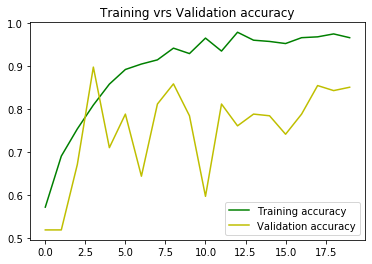

<Figure size 1080x1080 with 0 Axes>

In [595]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label = 'Training accuracy')

plt.plot(epochs, val_acc, 'y', label = 'Validation accuracy')
plt.title('Training vrs Validation accuracy')
plt.legend(loc=0)
plt.figure(figsize= (15,15))
plt.show()

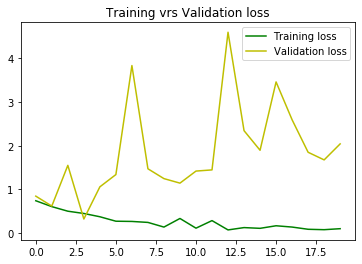

<Figure size 1080x1080 with 0 Axes>

In [596]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, loss, 'g', label = 'Training loss')

plt.plot(epochs, val_loss, 'y', label = 'Validation loss')
plt.title('Training vrs Validation loss')
plt.legend(loc=0)
plt.figure(figsize= (15,15))
plt.show()

## Transfer Learning
  **Using Pretrained filters to improve our training**


In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [13]:
import os 
from os import path

In [14]:
current = os.getcwd()

In [16]:
local_weights_file = path.join(current,'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [17]:
# Creating an instance of the pretrained model 
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights= None)

In [18]:
#Loading pretrained weights 
pre_trained_model.load_weights(local_weights_file)

In [644]:
#uncomment the code below to know the model summary  
#pre_trained_model.summary()


In [787]:
#Note we dont have to retrain the whole model.
"""
we can customize our model by freezing  the layers we prefer and 
adding our own layers to train the mode

"""
# Freezing the layer 
for layer in pre_trained_model.layers:
    layer.trainable = False 
    
# Getting the preferred layer from the pretrained model 
last_layer = pre_trained_model.get_layer('mixed10')

# Inspecting the output shape of the last layer 
print('last layer output shape: ', last_layer.output_shape)

#We need the output of the last layer to feed as input to our own Densed layers 
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [795]:
# adding our Densed layers to the pretrained layers
# Using the functional API method  ie x = func (output of the the mixed8 layer)

# 
x = tf.keras.layers.Flatten()(last_output)


# adding Densed layers of 1024 neurons 
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
# adding an output layer 
x=  tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [796]:
model3 = tf.keras.Model(pre_trained_model.input,x)
model3.compile(  optimizer = RMSprop(learning_rate =0.0001),
              loss = 'binary_crossentropy',
             metrics=['acc'])

In [797]:
# Creating an Image generator instance for the training data 
train_datagen2 = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 0.10,
                                  width_shift_range =0.20,
                                  height_shift_range=0.20,
                                  horizontal_flip =True,
                                  zoom_range = 0.30)

#flowing the data from the training directory or folder
train_gen2 = train_datagen2.flow_from_directory(
    
             training_dir,
    
             # the images are 300x300 pixels each
             target_size = (150,150),
    
             # since we have two categories of images we will use binary.
             # note! we use 'categorical' if categories are more than two  
             class_mode = 'binary'
             )

Found 1027 images belonging to 2 classes.


In [798]:
valid_datagen2 = ImageDataGenerator(rescale= 1/255)
valid_gen2 =  valid_datagen2.flow_from_directory(valid_dir, 
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                 
                                                   class_mode = 'binary'
                                                  )

Found 256 images belonging to 2 classes.


In [747]:
train_gen2[0][1]

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

In [748]:
valid_gen2[0][1]

array([1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0.], dtype=float32)

In [799]:
# fitting the model
history = model3.fit(
    train_gen2,
    validation_data = valid_gen2 ,
    steps_per_epoch =10,
    epochs=10,
     validation_steps = 10,
    )

Epoch 1/10
10/10 [==============================] - 26s 2s/step - loss: 3.4216 - acc: 0.7698 - val_loss: 0.0148 - val_acc: 0.9950
Epoch 2/10
10/10 [==============================] - 20s 2s/step - loss: 0.1896 - acc: 0.9812 - val_loss: 0.0133 - val_acc: 0.9900
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 0.0820 - acc: 0.9863 - val_loss: 0.0053 - val_acc: 0.9950
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 0.1164 - acc: 0.9656 - val_loss: 7.5277e-05 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 0.0845 - acc: 0.9897 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 21s 2s/step - loss: 0.2338 - acc: 0.9588 - val_loss: 0.3222 - val_acc: 0.9350
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 0.1563 - acc: 0.9863 - val_loss: 4.2055e-04 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 24s 2s/step - loss: 0.0023 - a

## Evaluating the model 

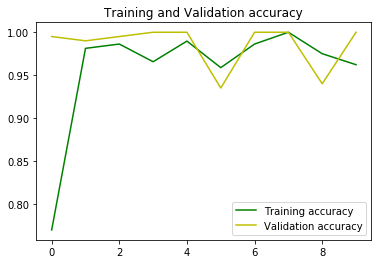

<Figure size 1080x1080 with 0 Axes>

In [800]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label = 'Training accuracy')

plt.plot(epochs, val_acc, 'y', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure(figsize= (15,15))
plt.show()

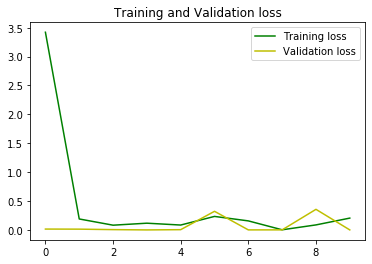

<Figure size 1080x1080 with 0 Axes>

In [801]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'g', label = 'Training loss')

plt.plot(epochs, val_loss , 'y', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure(figsize= (15,15))
plt.show()

In [804]:
model3.save("horseman.h5")